# Self Study 11: 2nd Order Difference Equations and Multiplier-Accelerator Models

In this self study we will review how to work with difference equations, solve them analytically and interpret their behaviour given their characteristic equation.

Specifically, in this self study we will:

1. Review how to solve a 1st order difference equation
2. See how to solve a 2nd order difference equation
3. Derive the analytical solution for  a simplified multiplier-accelerator model
4. Interpret the solution of the multiplier-accelerator model, using the characteristic equation


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from IPython.display import Markdown, display

# set nice plotting defaults
plt.style.use("seaborn-v0_8-whitegrid")

## Section 1: 1st to 2nd order linear *difference* equations

To explore and solve models defined as difference equations we need to learn how to work with them. We will start with first order difference equations. These are equations where the variable of interest is only a function of its previous value.

Consider the first order homogeneous linear difference equation.
$$
x(t+1) = a x(t) \quad \text{and} \quad x(0) = x_0
$$

Lets look at a few value of $t$, to see if there is a pattern.

In [2]:
x = sp.Function("x")
x0 = sp.symbols("x_0")
a = sp.symbols("a")


def y_func(t, a):
    return x0 if t == 0 else a * y_func(t - 1, a)


for t in [0, 1, 2, 3, 10]:
    expression = y_func(t, a)
    display(Markdown(f"$$ x({t}) = {sp.latex(expression)} $$"))

$$ x(0) = x_{0} $$

$$ x(1) = a x_{0} $$

$$ x(2) = a^{2} x_{0} $$

$$ x(3) = a^{3} x_{0} $$

$$ x(10) = a^{10} x_{0} $$

Indeed we see that $x(t) = a^t x_0$ is a solution to the difference equation. With this we have found a way to express the evolution of $x(t)$ for any $t$. Also for $t \in \mathbb{R}$, as long as we take only the real part.

#### An Example: The Harrod-Domar Model

As an example of an economic model formulated as first order difference equation lets consider the *Harrod-Domar* model of economic growth. The model is characterized by the following equations:

$$
\begin{align*}
S_t &= s Y(t) \\
I_t &= v ( Y(t) - Y(t-1) ) \\
S_t &= I_t \\
\end{align*}
$$

where $S$ is the savings, $I$ is investment, $Y$ is the output, $s$ the savings rate and $v$ is the capital accumulation rate. The last equation is an accounting identity that says that savings and investment are equal, despite the fact that they are determined by different factors.

Solving for $Y(t)$ we get the following first order difference equation:

$$
Y(t) = \frac{v}{v-s} Y(t-1)
$$

**Question:** What is the equilibrium of the system, i.e., what is $Y^*$ such that $Y(t) = Y(t-1) = Y^*$?

**Answer:** We can do this by setting $Y(t) = Y(t-1) = Y^*$ and solving for $Y^*$.

$$
Y^* = \frac{v}{v-s} Y^*
$$

$$
Y^* = 0
$$






**Question:** Wat is the analytical solution for the *evolution* of $Y(t)$?

**Answer:** We can do this by using the solution to the first order difference equation, where $a = v/(v-s)$ and $x_0 = Y(0)$.
$$
Y(t) = \left(\frac{v}{v-s}\right)^t Y(0)
$$

**Task:** Define the two python functions for $Y(t)$ one using the analytical solution and one using the iterative solution. 

Plot them for $t$ from 0 to 10 and show that they are the same.

In [3]:
# plot the system for different values of a
from functools import lru_cache

from ipywidgets import interact

# When working with recursive function we may end up calling the same function far "too often".
# Specifically, we may call the function with the same arguments yielding the same result multiple times.
# This is a waste of computation. We can avoid it by using "memoization", i.e. storing the
# results of previous function calls. This is what the @lru_cache decorator does.


def hd_recursion(x0, t_max, v, s):
    a = v / (v - s)
    @lru_cache(maxsize=None)
    def hd(t):
        return x0 if t == 0 else a * hd(t - 1)

    values = [hd(t) for t in range(t_max)]
    return values


# plot the system for different values of a
def plot_hd_recursive(x0, v, s):
    t = np.arange(0, 10)
    x = hd_recursion(x0=x0, t_max=10, v=v, s=s)
    plt.plot(t, x)
    plt.show()


interact(plot_hd_recursive, x0=(0, 10), v=(0.1, 1, 0.1), s=(0.01, 1, 0.1))

interactive(children=(IntSlider(value=5, description='x0', max=10), FloatSlider(value=0.5, description='v', ma…

<function __main__.plot_hd_recursive(x0, v, s)>

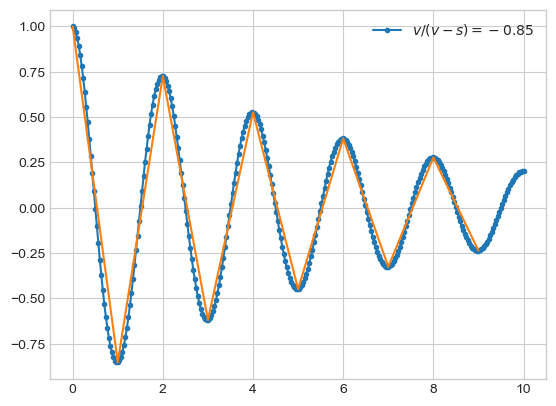

In [4]:
def harrod_domar_explicit(x0, t, v, s):
    a = v / (v - s)
    return np.real(np.power(a, t, dtype=np.complex64)) * x0


# @interact(s=(0.01, 0.9, 0.1), v=(0.1, 0.9, 0.1))
def plot_hd_explicit(x0, s, v):
    # use integers here. Fractional exponents mean complex numbers, e.g. t=0.5 -> square root
    t = np.linspace(0, 10, 300)
    y = harrod_domar_explicit(x0=x0, t=t, v=v, s=s)
    a = v / (v - s)
    plt.plot(t, y, label=f"$ v / (v - s) = {a:0.2f}$", marker=".")
    plt.legend()


plot_hd_explicit(x0=1, s=0.5, v=0.23)
plot_hd_recursive(x0=1, s=0.5, v=0.23)

**Question:** What can we say about the behaviour of the system for $a = \frac{v}{v-s}$?

**Answer:**

- If $|a| > 1$ the system diverges and dampens if $|a| < 1$.
- Oscillation depends the sign of $a$:
    - if $a < 0$ the system oscillates between positive and negative values.
    - if $a > 0$ the system grows or decays exponentially.

#### Non-homogeneous 1st order difference equations

Consider a slight modification of the Harrod-Domar model, where we add a constant term to the investment $I_0$. You can think of this as a government investment program.

$$
\begin{align}
S_t &= s Y(t) \\
I_t &= v ( Y(t) - Y(t-1) ) + I_0 \\
S_t &= I_t \\
\end{align}
$$

**Question:** What is the equilibrium of the system now?

In [5]:
s = sp.symbols("s")
v = sp.symbols("v")
t = sp.symbols("t")
I_0 = sp.symbols("I_0")
Y = sp.Function("Y")


def S(t, s):
    return s * Y(t - 1)


def I(t, v, s):
    return v * (Y(t) - Y(t - 1)) + I_0


eq = sp.Eq(S(t, s), I(t, v, s))
sol = sp.solve(eq, Y(t))[0]
sp.solve(sp.Eq(sol.subs({Y(t - 1): Y(t)}), Y(t)), Y(t))[0]

I_0/s

**Answer:**
The equilibrium of the system is no longer zero, but a constant $Y^* = I_0/s$

Solving for the evolution of $Y(t)$.

An approach way to solve *non-homogeneous* difference equations to subtract from all $Y(t)$ the equilibrium $Y^*$.
$$
\begin{align}
Y(t) - Y^* &= \frac{v}{v-s} \left( Y(t-1) - Y^* \right) \\
\bar{Y}(t) &= \frac{v}{v-s} \bar{Y}(t-1)
\end{align}
$$

After defining $\bar{Y}(t) = Y(t) - Y^*$ we are back to a homogeneous difference equation, for which we already know the solution.

$$
\bar{Y}(t) = \left(\frac{v}{v-s}\right)^t \bar{Y}(0)
$$

In short we have shown tha the solution to the non-homogeneous difference equation can be reduced to the solution of the homogeneous difference equation if we subtract the equilibrium from the variable of interest.

## Intermezzo: 2nd order linear *difference* equations

Lets consider a second order linear difference equation.

$$
x(t+2) = a x(t+1) + b x(t)
$$

We have seen that the solution to the *first order* difference equation is given by $x(t) = a^t x_0$.\
Through an analogous, but more involved argument, one can show that the solution to the second order difference equation has the form 


$$
x(t) = c_1 r^t + c_2 s^t
$$

for some constants $r$, $s$ and $c_1$ and $c_2$. If this is indeed the solution, then it should also be the case that:

$$
\underbrace{c_1 r^{t+2} + c_2 s^{t+2}}_{x(t+2)} = \underbrace{a \left( c_1 r^{t+1} + c_2 s^{t+1} \right) + b \left( c_1 r^t + c_2 s^t \right)}_{ a x(t+1) + b x(t)}
$$

To find the solution we need to find $r$ and $s$ satisfying this relation. Lets rearrange the equation a bit and factor to get:
$$
c_1 r^t \left( r^2 - a r - b \right) + c_2 s^t \left( s^2 - a s - b \right) = 0
$$

This relation is satisfied *iff* both coefficients involving $r$ and $s$, of the **characteristic equation** are zero:

$$
x^2 - a x - b = 0 \qquad  x \in \{r, s\}
$$

That is,
$$
r, s = \frac{a \pm \sqrt{a^2 + 4 b}}{2}
$$

where $r$ is the larger root, i.e, $|r| > |s|$, which is also known as the **dominant root**.


To find $c_1$ and $c_2$ we recall that:
$$
\begin{align}
y_0 &= c_1 r^0 + c_2 s^0 = c_1 + c_2 \\
y_1 &= c_1 r^1 + c_2 s^1 = c_1 r + c_2 s
\end{align}

**Question:** Find the analytical expression for $c_1$ and $c_2$ given the system of equations above.

**Answer:**
$$
c_1 = \frac{y_1 - s y_0}{r - s} \qquad
c_2 = \frac{y_1 - r y_0}{s - r}
$$


#### Interpreting the Roots of Second-Order Difference Equations

There is a close connection between the roots of the characteristic equation and the behaviour of the system [^1]. We can distinguish three cases:

1. The roots are real and distinct, i.e., $r \neq s$.
2. The roots are real and equal, i.e., $r = s$.
3. The roots are complex conjugates, i.e., $r = \alpha + i \beta$ and $s = \alpha - i \beta$.


##### Case 1: Real and Distinct Roots

The long term behaviour is determined by the dominant root, $r$.

1. $r > 1$ the system diverges, since $r^t \to \infty$ as $t \to \infty$.
2. $r = 1$ the system is stable, since $r^t = 1$ for all $t$.
3. $0 \leq r < 1$ the system monotonically decays to zero: $r^t \to 0$ as $t \to \infty$.
4. $-1 < r \leq 0$ the system oscillates and decays to zero.
5. $r = -1$ the system oscillates between 2 values: since $r^t = (-1)^t$.
6. $r < -1$ the system oscillates and diverges: $r^t \to \pm \infty$ as $t \to \infty$.

##### Case 2: Real and Equal Roots

In this case $r = s$ so we describe in terms of $r$.

1. $|r| \geq 1$ the system diverges monotonically.
2. $|r| < 1$ the system converges to zero.
4. $r \leq -1$ the system oscillates

##### Case 3: Complex Conjugate Roots

The solutions are of the form: $r = \alpha + i \beta$ and $s = \alpha - i \beta$.

In this case the system oscillates.
Whether the system diverges, collapeses or sattles into stable oscillation depends on $R=\sqrt{\alpha^2 + \beta^2}$:

- $R>1$ Divergent oscillation
- $R=1$ Sustained oscillation
- $R<1$ Damped oscillation

Details of the derivation are available in [^1].

[^1]: *See Shone, Economic Dynamics (2002), Chapter 3 for more details*


### Summary:
In short we has seen how to solve the 2nd order linear difference equation via the characteristic equation.

Note how to obtain the characteristic equation from the difference equation:

$$
\begin{align}
y(t+2) &= a y(t+1) + b y(t) \\
y(t+2) - a y(t+1) - b y(t)&= 0 \\
x^2 - a x - b &= 0
\end{align}
$$

after solving for $r$ and $s$ we can write the solution as:

$$
x(t) = c_1 r^t + c_2 s^t
$$

The behaviour of the system is determined by the roots of the characteristic equation, specifically the dominant root $r$ if the roots are real and by $R$ if they are complex.

## Section 2: The Multiplier-Accelerator Model (Evolution)

The multiplier-accelerator first outlined by Samuelson (1939) is a simple model of the business cycle. I will use a slightly different version from the one used in the lecture.

$$
C_t = a + b Y_{t-1}
$$

Investment is a function of the change in output,

$$
I_t = v ( Y_{t-1} - Y_{t-2} )
$$

Finally we assume that the economy is closed,
$$
Y_t = C_t + I_t
$$

Notice, how the model can be seen as an extension of the Harrod-Domar model.
### Task 1: Find the recurrence relation

Find $Y_t$ as a function of its previous values, e.g., $Y_{t-1}$ and $Y_{t-2}$.

In [6]:
# define symbols
t, a, b, v = sp.symbols("t a b v")
Y = sp.Function("Y")


def C(t, a, b):
    return a + b * Y(t - 1)


def I(t, v):
    return v * (Y(t - 1) - Y(t - 2))


def aggregate_output(t, a, b, v):
    return C(t, a, b) + I(t, v)


sp.simplify(aggregate_output(t, a, b, v))

a + b*Y(t - 1) - v*(Y(t - 2) - Y(t - 1))

### Task 2: Find the equilibrium output

Find the the equilibrium output $Y^*$, i.e., the value of $Y_t$ such that $Y_t = Y_{t-1} = Y_{t-2}$.

In [7]:
## EQUILIBRIUM

# substitute Y(t-i) with Y(t)
equilibrium_substitution = {Y(t - i): Y(t) for i in range(0, 3)}
equilibrium_eq = sp.Eq(
    aggregate_output(t, a, b, v).subs(equilibrium_substitution), Y(t)
)
# equilibrium_eq
eq_sol = sp.solve(equilibrium_eq, Y(t))[0]
eq_sol

-a/(b - 1)

### Task 3: Plot the evolution of the system and the equilibrium

Using the recurrence relation you found above and the equilibrium value, plot the evolution of the system for different values of $b$ and $v$.
Specifically, plot $Y_t$ and $Y^*$ as a function of $t$ and the phase diagram of $Y_{t-1}$ vs $Y_t$.

`y_evolution` was called **15** times

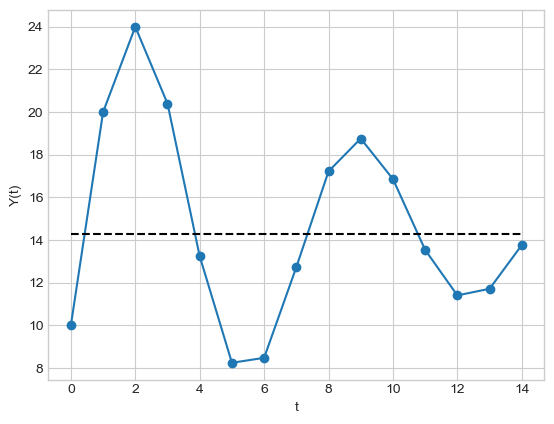

In [8]:
called = 0


def y_evolution(t_max, a, b, v, y0, y1):
    @lru_cache()
    def y(t):
        global called
        called += 1
        if t == 0:
            return y0
        elif t == 1:
            return y1
        else:
            return a + b * y(t - 1) - v * (y(t - 2) - y(t - 1))

    y_seq = [y(t) for t in range(t_max)]
    return y_seq


def plot_system(a, b, v, y0, y1):
    ts = np.arange(0, 15)
    y = y_evolution(t_max=15, a=a, b=b, v=v, y0=y0, y1=y1)
    equilibrium = -a / (b - 1)
    plt.plot(ts, y, marker="o")
    plt.plot(
        ts,
        equilibrium * np.ones_like(ts),
        linestyle="--",
        color="black",
        label="equilibrium",
    )
    plt.xlabel("t")
    plt.ylabel("Y(t)")


plot_system(a=10, b=0.3, v=0.8, y0=10, y1=20)
display(Markdown(f"`y_evolution` was called **{called:,}** times"))

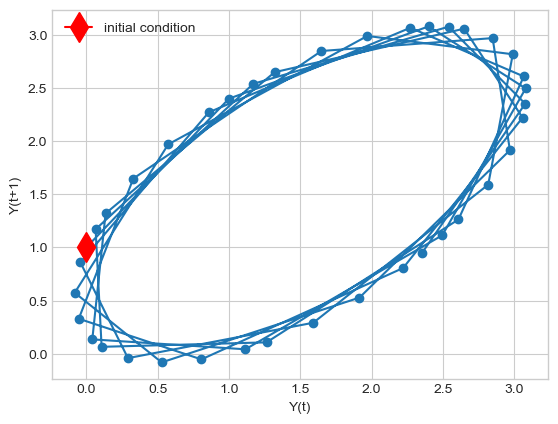

In [9]:
def plot_phase_diagram(a, b, v, y0, y1):
    y = y_evolution(t_max=40, a=a, b=b, v=v, y0=y0, y1=y1)
    plt.plot(y[:-1], y[1:], marker="o")
    plt.xlabel("Y(t)")
    plt.ylabel("Y(t+1)")
    plt.plot(y0, y1, marker="d", color="red", label="initial condition", markersize=15)
    plt.legend()


plot_phase_diagram(a=1.2, b=0.2, v=1, y0=0, y1=1)

## Section 3: The Multiplier-Accelerator Model (Characteristics Equation)

### Task 1: Finding the characteristic equation

To simplify the derivation we will assume that we deal with a homogeneous system, i.e., we assume that in the model $a = 0$.

Remember from the previous section that the characteristic equation (in $x$) for the difference equation (in $y$) is given by:


$$
\begin{align}
y(t+2) &= &A y(t+1) + &B y(t) \\
0 &= y(t+2) &- A y(t+1) - &B y(t) \\
0 &= x^2 &- A x - &B
\end{align}
$$

So we need to find the the coefficients after putting the difference equation in the form, and identify $A$ and $B$.

$$
Y(t) - A Y(t-1) + B Y(t-2) = 0
$$

In [10]:
# Step 1: Define the function for $Y(t) = f(Y(t-1), Y(t-2))$, assume that $a=0$ (drop it)
yt_eq = Y(t) - aggregate_output(t, a, b, v)

# Step 2: Expand the equation to be able to identify the coefficients, or do it by hand
sp.expand(yt_eq) + a

-b*Y(t - 1) + v*Y(t - 2) - v*Y(t - 1) + Y(t)

So the characteristic equation is given by:

$$
x^2 - (b + v) x + v = 0
$$

In [11]:
# Step 2: Solve the characteristic equation for the roots $r_1$ and $r_2$.
x = sp.symbols("x")

char_A = b + v
char_B = -v

rs_sols = sp.solve(x**2 - char_A * x - char_B, x)

r = rs_sols[0]
s = rs_sols[1]

r

b/2 + v/2 - sqrt(b**2 + 2*b*v + v**2 - 4*v)/2

**Question:** What are the roots of the characteristic equation? What can these roots tell us about the behaviour of the system?

**Answer:**
See the summary of the previous section. Note that $A = b + v$ and $B = v$. Hence when $b + v > 4 v$ we have real and distinct roots, when $(b + v)^2 = 4 v$ we have real and equal roots and when $(b + v)^2 < 4 v$ we have complex roots.

#### Task 2: Find the analytical solution for the multiplier-accelerator model


**Question:** With $r$ and $s$ write down the explicit form for $c_1$ and $c_2$ for the multiplier-accelerator model.


**Answer:**
$$
c_1 = \frac{Y_1 - s Y_0}{r - s} \qquad
c_2 = \frac{Y_1 - r Y_0}{s - r}
$$

where $r$ and $s$ are the roots of the characteristic equation.

In [12]:
y0, y1 = sp.symbols("y_0 y_1")

c1 = (y1 - s * y0) / (r - s)
c2 = (y1 - r * y0) / (s - r)
c1

-(-y_0*(b/2 + v/2 + sqrt(b**2 + 2*b*v + v**2 - 4*v)/2) + y_1)/sqrt(b**2 + 2*b*v + v**2 - 4*v)

**Question:** What does the equation for $Y_t$ look like (with $a=0$)? (Note, it is not a nice expression).

In [13]:
# putting it all together
y_homogenous = c1 * r**t + c2 * s**t
y_homogenous

(-y_0*(b/2 + v/2 - sqrt(b**2 + 2*b*v + v**2 - 4*v)/2) + y_1)*(b/2 + v/2 + sqrt(b**2 + 2*b*v + v**2 - 4*v)/2)**t/sqrt(b**2 + 2*b*v + v**2 - 4*v) - (-y_0*(b/2 + v/2 + sqrt(b**2 + 2*b*v + v**2 - 4*v)/2) + y_1)*(b/2 + v/2 - sqrt(b**2 + 2*b*v + v**2 - 4*v)/2)**t/sqrt(b**2 + 2*b*v + v**2 - 4*v)

In [14]:
# plot_system(a=10, b=0.3, v=.8, y0=10, y1=20)
my_explicite_func = sp.lambdify(
    t, y_homogenous.subs({v: 0.8, b: 0.4, y0: 0, y1: 1, a: 0}), "numpy"
)

### Task 4: Plot the analytical solution


Using the analytical solution you found above, plot the evolution of the system for different values of $b$ and $v$.

/Users/lucaverginer/mambaforge/envs/edc/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/lucaverginer/mambaforge/envs/edc/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


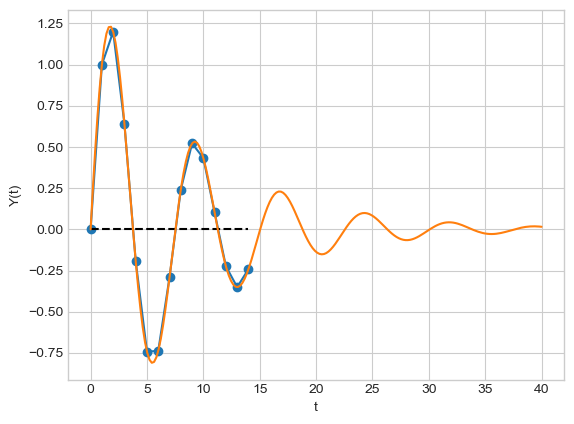

In [15]:
plot_system(a=0, b=0.4, v=0.8, y0=0, y1=1)
ts = np.linspace(0, 40, 200)
plt.plot(ts, my_explicite_func(ts))

### Task 5: Interpret analytical solution using the dominant root

**Question:** What is the dominant root?

**Answer:** The dominant root is the larger root, usually denoted $r$, |r| > |s|.

**Question:** Given the following values for $b$ and $v$ and the resulting $r$ and $s$, what can you say about the behaviour of the system?

In [16]:
def roots(b, v):
    char_A = b + v
    char_B = v
    rs = sp.solve(x**2 - char_A * x + char_B, x)
    if len(rs) == 1:  # only a single root r=s
        return rs[0], rs[0]
    else:  # return the root with the largest absolute value first
        return sorted(rs, key=lambda r: np.abs(r), reverse=True)


parameters = [
    {"b": 1 / 2, "v": 3},
    {"b": 1, "v": 1 / 2},
    {"b": 1, "v": 1},
    {"b": 1 / 2, "v": 1 / 2},
]

# print nicely formatted table in markdown
table = "| $b$ | $v$ | $r$ | $s$ |\n|---|---|---|---|\n"
for p in parameters:
    r, s = roots(**p)
    table += f"| {p['b']} | {p['v']} | {r} | {s} |\n"
display(Markdown(table))

| $b$ | $v$ | $r$ | $s$ |
|---|---|---|---|
| 0.5 | 3 | 2.00000000000000 | 1.50000000000000 |
| 1 | 0.5 | 1.00000000000000 | 0.500000000000000 |
| 1 | 1 | 1 | 1 |
| 0.5 | 0.5 | 0.5 - 0.5*I | 0.5 + 0.5*I |
